<a href="https://colab.research.google.com/github/satya12388/Satya_tensorflow/blob/main/TransferLearning/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the data

Getting 10 persent of food dat

In [ ]:
import zipfile
import os

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
ref.extractall()
ref.close()

--2024-04-05 14:02:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.207, 209.85.147.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   159MB/s    in 1.0s    

2024-04-05 14:02:30 (159 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



Walking through Data Directory

In [ ]:
for dir_path,dir_name,file_name in os.walk("./10_food_classes_10_percent"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} images in {dir_path}")

There are 2 directories and 0 images in ./10_food_classes_10_percent
There are 10 directories and 0 images in ./10_food_classes_10_percent/train
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/sushi
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/hamburger
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/ramen
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/steak
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/ice_cream
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/pizza
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/fried_rice
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/grilled_salmon
There are 0 directories and 75 images in ./10_food_classes_10_percent/train/chicken_cur

## Becomig One With Data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def plot_random_image(path):
  img = random.sample(os.listdir(path),2)
  plt.Figure(figsize=(10,20))
  for i in range(len(img)):
    plt.subplot(2,2,i+1)
    p_img = mpimg.imread(path+img[i])
    plt.imshow(p_img)
    plt.title(path.split('/')[-2])
    plt.axis("off")

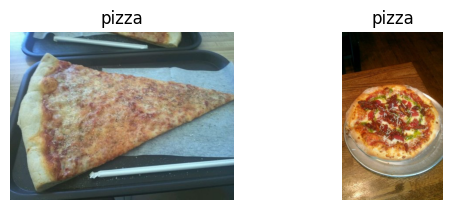

In [ ]:
plot_random_image("/content/10_food_classes_10_percent/train/pizza/")

## Converting images to Tensors

> Code using Generators

We can use Image Data [Generators](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) from preprocessing or directly use [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

📒 Note we have to create generator instance for generator but image_data_from_directory can be used directly

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale = 1/255.)
test_gen = ImageDataGenerator(rescale = 1/255.)
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
train_data_10_percent = train_gen.flow_from_directory(train_dir,target_size = (224,224),batch_size=32,class_mode = "categorical")
test_data_10_percent = test_gen.flow_from_directory(test_dir,target_size = (224,224),batch_size = 32,class_mode = "categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


> Code using Image Dataset from Directory

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_data_10_percent_1 = image_dataset_from_directory(train_dir,image_size = (224,224))
test_data_10_percent_1  = image_dataset_from_directory(test_dir,image_size = (224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## one more way to visualize images

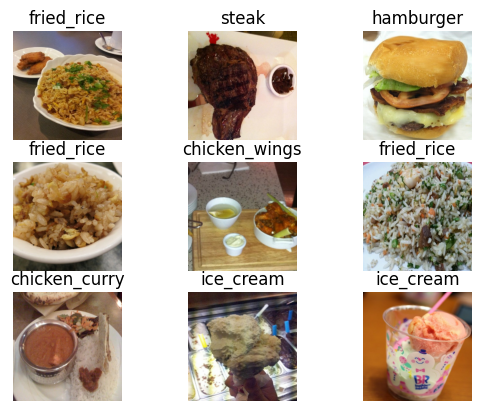

In [ ]:
classes = train_data_10_percent_1.class_names
for images,labels in train_data_10_percent_1.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])
    plt.axis("off")

## Keras Sequential vs Functional API

📒 Sequential as name indicates flows from one layer to other where as Functional will be used by following/ Sending the layers to previous layers

> Example for Sequential

In [ ]:
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32),
    Dense(32),
    Dense(10)
])

> Exampe for Functional

In [ ]:
input = Input(shape = (174,))
h1 = Dense(32)(input)
h2 = Dense(32)(h1)
h3 = Dense(32)(h2)
model = tf.keras.Model(inputs =input,outputs = h3)

## 2 ways of building Transfer Learning

### Using Hub Model

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [ ]:
effnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/frameworks/TensorFlow2/variations/b0-feature-vector/versions/1"

extract_layer  = hub.KerasLayer(effnet_url,trainable=False,input_shape = (224,224,3))
eff_model = tf.keras.Sequential([
    extract_layer,
    Dense(10,activation = "softmax")
])

In [ ]:
eff_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)
eff_model.compile(loss = "categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

In [ ]:
eff_history = eff_model.fit(train_data_10_percent,
                            epochs =5,
                            steps_per_epoch = len(train_data_10_percent))

Epoch 1/5
24/24 [==============================] - 14s 124ms/step - loss: 1.8548 - accuracy: 0.4133
Epoch 2/5
24/24 [==============================] - 3s 105ms/step - loss: 1.0618 - accuracy: 0.7787
Epoch 3/5
24/24 [==============================] - 3s 104ms/step - loss: 0.7473 - accuracy: 0.8453
Epoch 4/5
24/24 [==============================] - 2s 94ms/step - loss: 0.5995 - accuracy: 0.8720
Epoch 5/5
24/24 [==============================] - 2s 92ms/step - loss: 0.5057 - accuracy: 0.8907


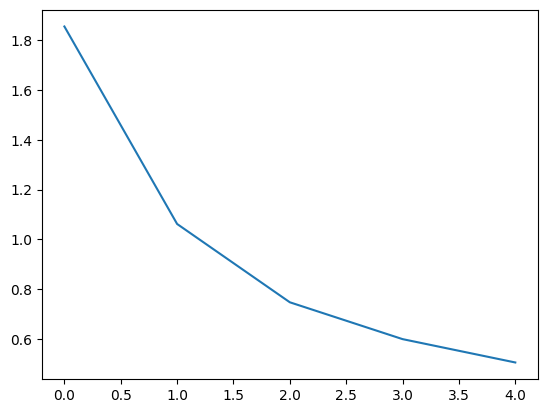

In [ ]:
plt.plot(eff_history.history["loss"])

In [ ]:
eff_model.evaluate(test_data_10_percent)

79/79 [==============================] - 10s 113ms/step - loss: 0.5539 - accuracy: 0.8616


[0.5538634657859802, 0.8615999817848206]

In [ ]:
def prep_image(file,shape = 224):
  img = tf.io.read_file(file)
  img = tf.image.decode_image(img,channels = 3)
  img = tf.image.resize(img,[shape,shape])
  img = img/255
  return img

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = prep_image("03-steak.jpeg")

--2024-04-05 14:03:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-04-05 14:03:20 (32.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
steak.shape

TensorShape([224, 224, 3])

In [ ]:
prediction_array = eff_model.predict(tf.expand_dims(steak,axis =0))

1/1 [==============================] - 2s 2s/step


In [ ]:
classes[prediction_array.argmax()]

'steak'

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
hb = prep_image("03-hamburger.jpeg")

In [ ]:
prediction_array = eff_model.predict(tf.expand_dims(hb,axis =0))

1/1 [==============================] - 0s 29ms/step


In [ ]:
classes[prediction_array.argmax()]

'hamburger'

### using Keras applications and functional API

In [ ]:
from tensorflow.keras import applications
from tensorflow.keras.layers import Input,Dense,GlobalAveragePooling2D
from tensorflow.keras import Model

base_model = applications.EfficientNetB0(include_top = False,classes = 10)
base_model.trainable = False
inputs = Input(shape = (224,224,3),name = 'inputs')
x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
output  = Dense(10,activation = "softmax")(x)
eff_app = Model(inputs,output)

In [ ]:
tf.random.set_seed(42)
eff_app.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
eff_app.fit(train_data_10_percent,
            epochs =5,
            )

Epoch 1/5
24/24 [==============================] - 9s 92ms/step - loss: 2.3366 - accuracy: 0.0880
Epoch 2/5
24/24 [==============================] - 2s 97ms/step - loss: 2.3248 - accuracy: 0.0840
Epoch 3/5
24/24 [==============================] - 2s 93ms/step - loss: 2.3324 - accuracy: 0.0960
Epoch 4/5
24/24 [==============================] - 3s 106ms/step - loss: 2.3262 - accuracy: 0.0960
Epoch 5/5
24/24 [==============================] - 2s 91ms/step - loss: 2.3247 - accuracy: 0.0840


In [ ]:
eff_app.evaluate(test_data_10_percent)

79/79 [==============================] - 9s 93ms/step - loss: 2.3312 - accuracy: 0.1000


[2.3312079906463623, 0.10000000149011612]

In [ ]:
hb.shape

TensorShape([224, 224, 3])

In [ ]:
eff_app_pred = eff_app.predict(tf.expand_dims(steak,axis = 0))

1/1 [==============================] - 1s 1s/step


In [ ]:
classes[eff_app_pred.argmax()]

'steak'

In [ ]:
eff_app.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_5  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_17 (Dense)            (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________
